## 20143692_Kangkyeungseok
## Machine Learning Assignment 06
## K-means algorithm on color image

In [1]:
#import library
import matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

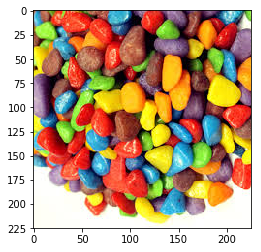

In [2]:
#find color image and read.
image=cv2.imread('C:\\Users\\rkdru\\Desktop\\test\\images.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
#check image size and define size_row, size_col
size_row=len(image[:,:,:])
size_col=len(image[0,:,:])

In [5]:
#define function about normalize& distance
def normalize(data):
    data_normalized=(data-min(data))/(max(data)-min(data))
    return data_normalized
def distance(x,y):
    d=(x-y)**2
    s=np.sum(d)
    return s

In [14]:
def Clustering_image_about_kmeans(k):
    global plot_data_energy
    plot_data_energy=[]
    label_image=np.empty((size_row,size_col),dtype=int)
    cluster=[]
    for i in range(0,k):
        temp=[]
        cluster.append(temp)
    for i in range(0,size_row):
        for j in range(0,size_col):
            label_image[i,j]=random.randrange(0,k)
            cluster[label_image[i,j]].append(image[i,j])

    Initial_Clustering(cluster,k)

In [15]:
def Initial_Clustering(cluster,k):
    centroid=np.zeros((k,3),dtype=float)
    for i in range(k):
        for j in range(len(cluster[i][0])):
            centroid[i]+=cluster[i][j]
        centroid[i]/=len(cluster[j])
    Energy(centroid,k,cluster)

In [16]:
def label(x,k,centroid):
    args=[]
    temp=0
    
    for i in range(k):
        temp = distance(x,centroid[i])
        args.append(temp)
        temp=0
    return np.argmin(args)

In [17]:
#clustering image
def Clustering(centroid,k):
    centroid2=np.zeros((k,3),dtype=float)
    cluster=[]
    for i in range(0,k):
        temp=[]
        cluster.append(temp)
        
    for i in range(0,size_row):
        for j in range(0,size_col):
            temp=label(image[i,j],k,centroid)
            cluster[temp].append(image[i,j])
            
    for i in range(k):
        for j in range(len(cluster[i])):
            centroid2[i]+=cluster[i][j]
            
        if(len(cluster[i])!=0):
            centroid2[i]/=len(cluster[i])
    #if energy value is no change then,,        
    if np.array_equal(centroid,centroid2):
        print("There is no change in Energy.. so Finish the calculation")
        plot()
        plot_centroid(centroid2,k)
        return centroid2
    else:
        Energy(centroid2,k,cluster)

In [18]:
#calculate Energy value
def Energy(centroid,k,cluster):
    energy=0
    for i in range(k):
        for j in range(len(cluster[i])):
            energy+=distance(cluster[i][j],centroid[i])
    energy_value=energy/(size_col*size_row)
    plot_data_energy.append(energy)
    Clustering(centroid,k)

In [24]:
def plot_centroid(centroid,k):
    image_c=image.copy()
    for i in range(0,size_row):
        for j in range(0,size_col):
            image_c[i]=centroid[label(image[i,j],k,centroid)]
            
    plt.title("clustering image")        
    plt.imshow(image_c)
    plt.show()

There is no change in Energy.. so Finish the calculation


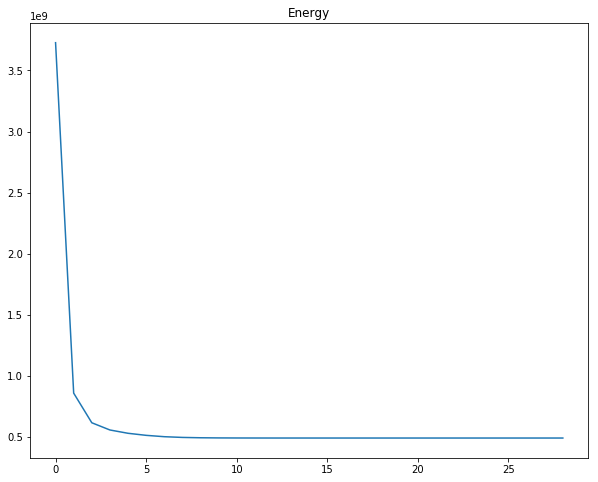

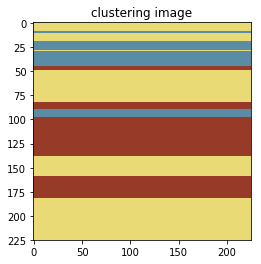

In [25]:
# Test 1 , k=3
Clustering_image_about_kmeans(3)

73624.98986677075
12221.618079108795
6849.073006544
5827.182183558108
5329.007465663911
5084.782961149383
4879.89687514323
4529.7843481538985
4158.662530539611
3992.459226906376
3936.4629786099044
3916.865427429176
3910.2268955015866
3908.476939465622
3907.928600959227
3907.7372234118816
3907.6766189605974
3907.655936092945
3907.650110542918
3907.6497171329497
3907.6496237567912
3907.649575697589
3907.6494947311226
3907.6493610516736
There is no change in Energy.. so Finish the calculation


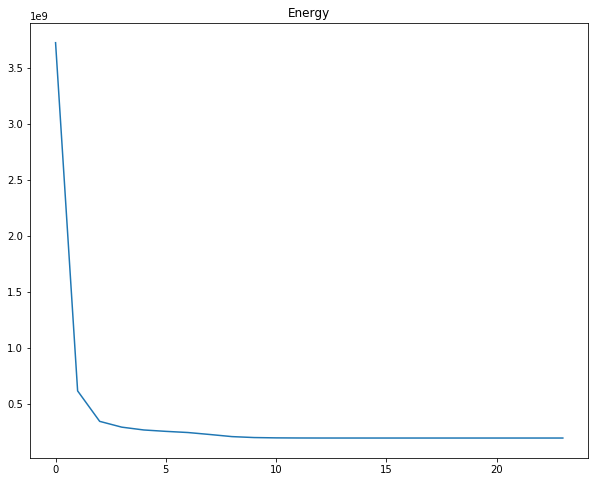

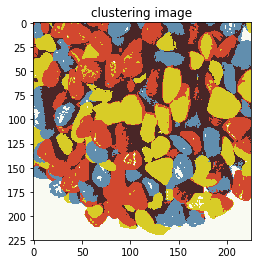

In [184]:
# Test 2 , k=5
Clustering_image_about(5)

In [26]:
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import numpy as np
import random


size_row	= 100
size_col  	= 100
x_matrix = np.empty((size_col, size_row), dtype=int)
y_matrix = np.empty((size_col, size_row), dtype=int)

for i in range(0, size_row):
    for j in range(0, size_col):
        x_matrix[i][j] = i
        y_matrix[i][j] = j

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def l2_distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    #r = np.sqrt(s)

    return(s)

#
# example of distance function between two vectors x and y
#
def l1_distance(x, y):

    d = abs(x - y)
    s = np.sum(d)
    
    return(s)

#
# calcuate the values of the input data in l2-norm
#
def norm(x):
    r = np.sqrt(x.T * x)
    
    return(r)

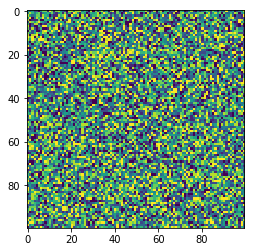

C:\Users\rkdru\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\rkdru\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars


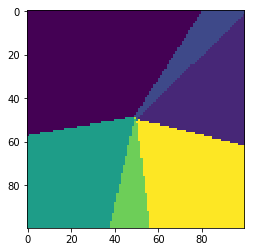

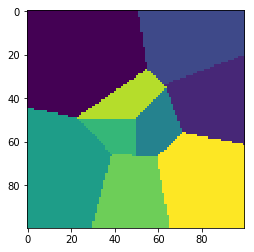

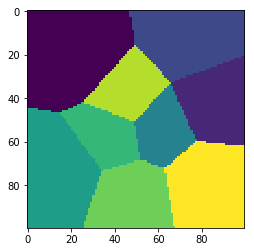

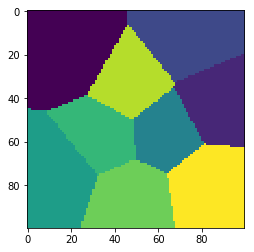

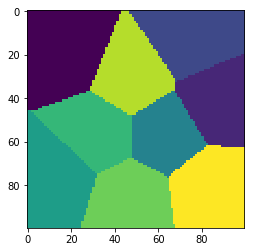

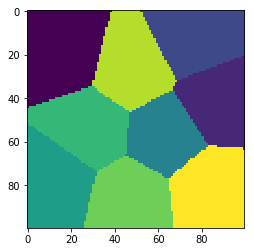

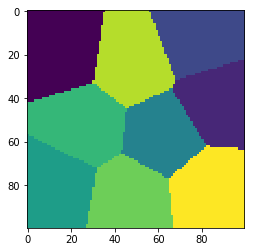

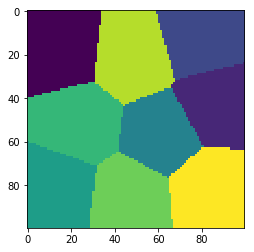

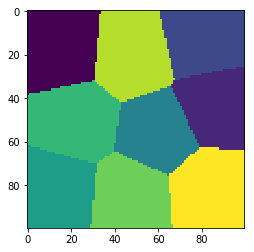

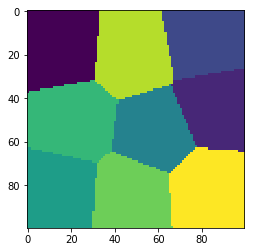

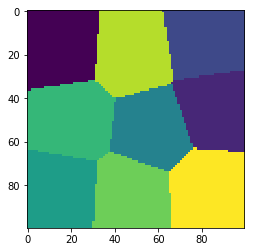

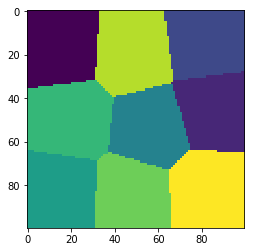

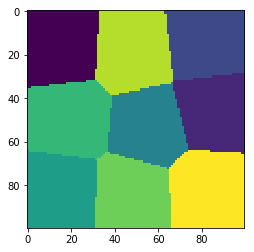

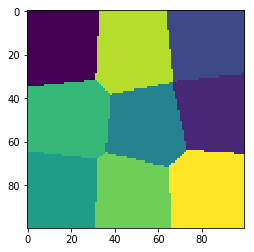

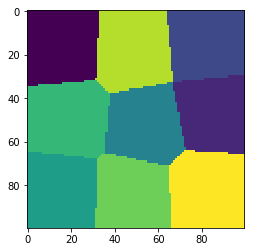

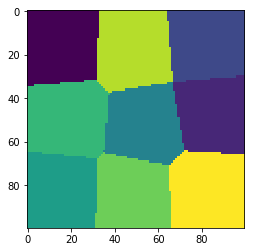

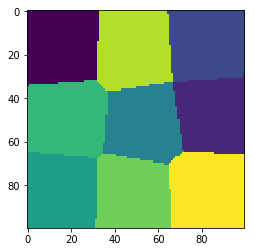

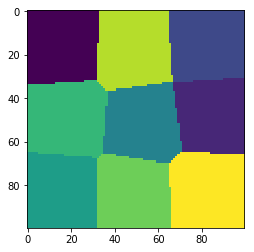

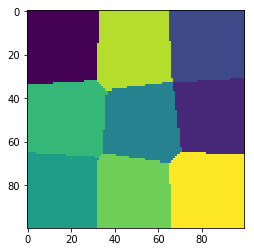

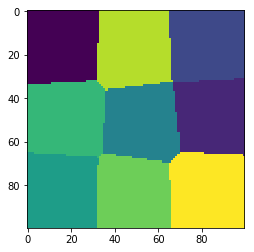

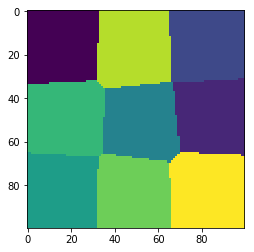

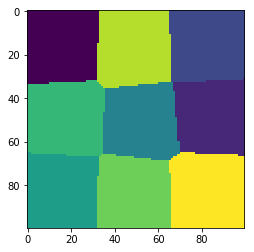

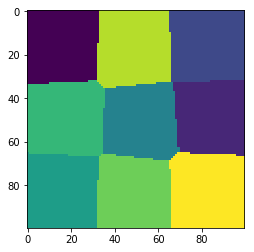

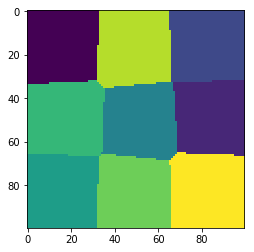

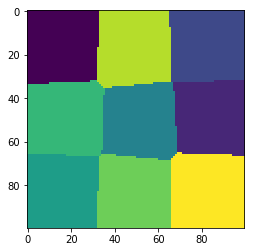

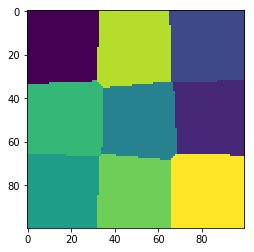

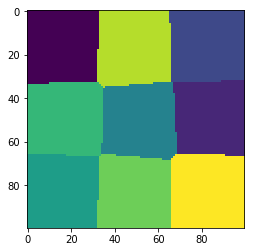

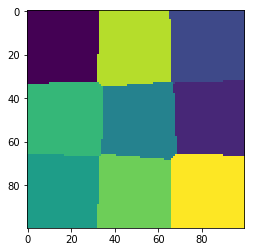

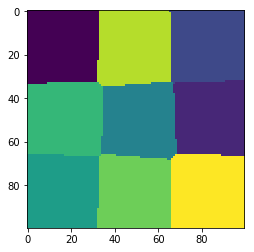

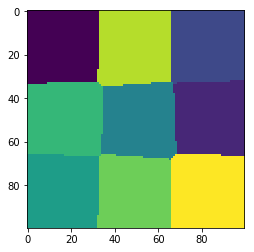

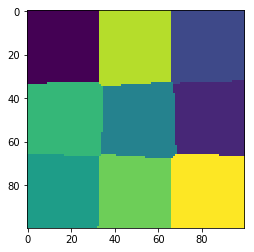

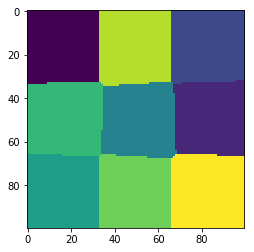

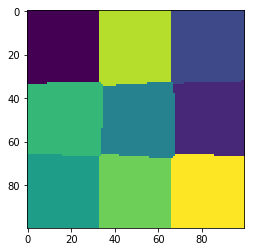

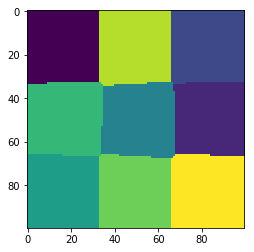

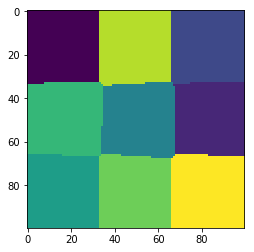

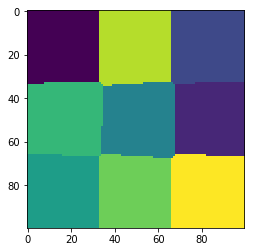

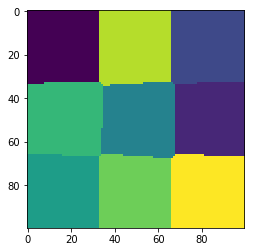

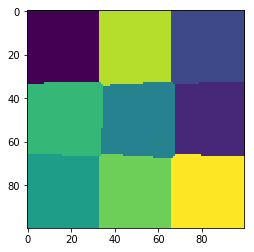

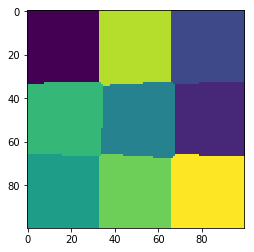

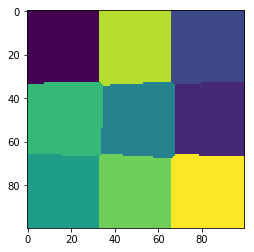

In [29]:
k = 10

x_list_centroid = np.zeros(k, dtype=float)
x_list_count    = np.zeros(k)
y_list_centroid = np.zeros(k, dtype=float)
y_list_count    = np.zeros(k)

list_label    = np.empty((size_col, size_row), dtype=int)

for i in range(size_col):
    for j in range(size_row):
        label       = random.randint(0, k - 1)
        list_label[i][j]       = label
        x_list_centroid[label]+= x_matrix[i][j]
        y_list_centroid[label]+= y_matrix[i][j]
        x_list_count[label]      += 1
        y_list_count[label]      += 1
        

for i in range(0, k):
    x_list_centroid[i] /= x_list_count[i]
    y_list_centroid[i] /= y_list_count[i]

while True:
    plt.imshow(list_label)
    plt.show()
    checkUpdate = 0
    for i in range(size_col):
        for j in range(size_row):
            label = list_label[i][j]
            min = l2_distance(x_list_centroid[label], x_matrix[i][j]) + l2_distance(y_list_centroid[label], y_matrix[i][j])
            
            for m in range(k):
                if m == label:
                    continue

                checkDistance = l2_distance(x_list_centroid[m], x_matrix[i][j]) + l2_distance(y_list_centroid[m], y_matrix[i][j])
                if(min > checkDistance):
                    list_label[i][j] = m
                    min = checkDistance
                    checkUpdate += 1
                    
    if(checkUpdate == 0):
        break
    
    x_list_centroid = np.zeros(k, dtype=float)
    y_list_centroid = np.zeros(k, dtype=float)
    x_list_count = np.zeros(k)
    y_list_count = np.zeros(k)
    
    for i in range(size_col):
        for j in range(size_row):
            label = list_label[i][j]
            x_list_centroid[label] += x_matrix[i][j]
            y_list_centroid[label] += y_matrix[i][j]
            x_list_count[label]       += 1
            y_list_count[label]       += 1

    for i in range(0, k):
        x_list_centroid[i] /= x_list_count[i]
        y_list_centroid[i] /= y_list_count[i]

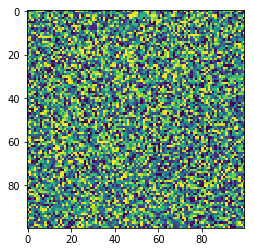

C:\Users\rkdru\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\rkdru\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars


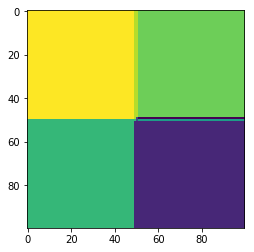

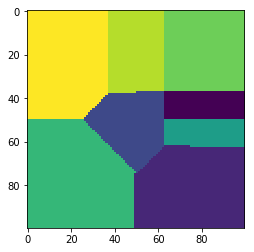

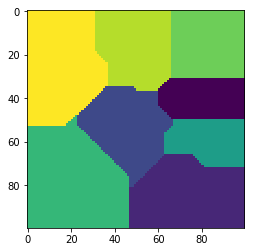

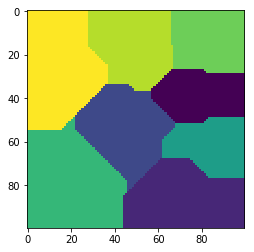

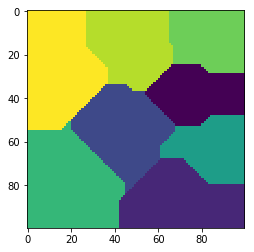

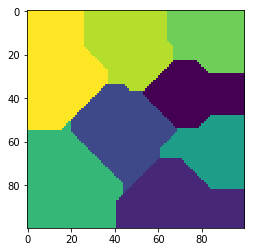

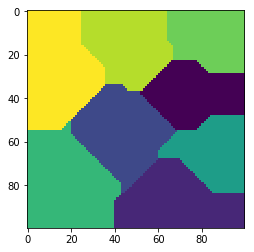

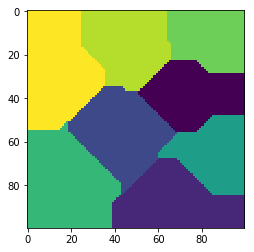

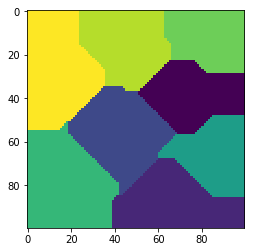

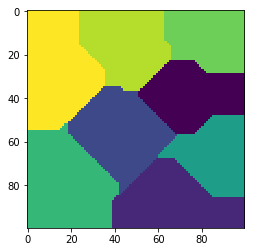

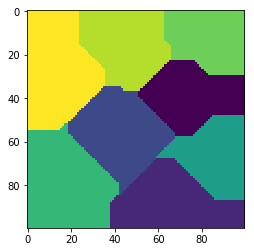

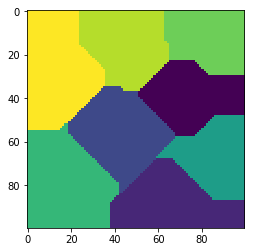

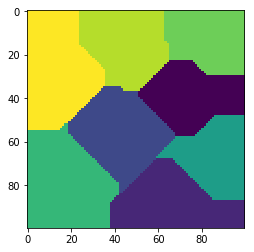

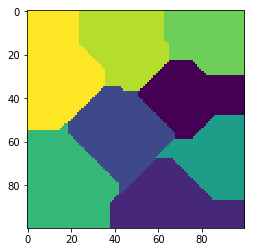

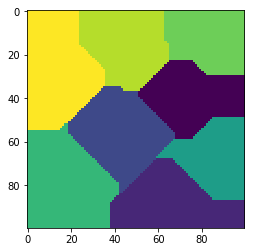

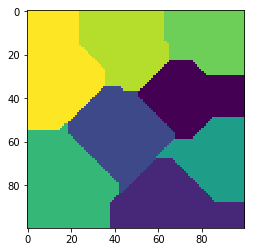

In [30]:
k = 10

x_list_centroid = np.zeros(k, dtype=float)
x_list_count    = np.zeros(k)
y_list_centroid = np.zeros(k, dtype=float)
y_list_count    = np.zeros(k)

list_label    = np.empty((size_col, size_row), dtype=int)

for i in range(size_col):
    for j in range(size_row):
        label       = random.randint(0, k - 1)
        list_label[i][j]       = label
        x_list_centroid[label]+= x_matrix[i][j]
        y_list_centroid[label]+= y_matrix[i][j]
        x_list_count[label]      += 1
        y_list_count[label]      += 1
        

for i in range(0, k):
    x_list_centroid[i] /= x_list_count[i]
    y_list_centroid[i] /= y_list_count[i]

while True:
    plt.imshow(list_label)
    plt.show()
    checkUpdate = 0
    for i in range(size_col):
        for j in range(size_row):
            label = list_label[i][j]
            min = l1_distance(x_list_centroid[label], x_matrix[i][j]) + l1_distance(y_list_centroid[label], y_matrix[i][j])
            
            for m in range(k):
                if m == label:
                    continue

                checkDistance = l1_distance(x_list_centroid[m], x_matrix[i][j]) + l1_distance(y_list_centroid[m], y_matrix[i][j])
                if(min > checkDistance):
                    list_label[i][j] = m
                    min = checkDistance
                    checkUpdate += 1
                    
    if(checkUpdate == 0):
        break
    
    x_list_centroid = np.zeros(k, dtype=float)
    y_list_centroid = np.zeros(k, dtype=float)
    x_list_count = np.zeros(k)
    y_list_count = np.zeros(k)
    
    for i in range(size_col):
        for j in range(size_row):
            label = list_label[i][j]
            x_list_centroid[label] += x_matrix[i][j]
            y_list_centroid[label] += y_matrix[i][j]
            x_list_count[label]       += 1
            y_list_count[label]       += 1

    for i in range(0, k):
        x_list_centroid[i] /= x_list_count[i]
        y_list_centroid[i] /= y_list_count[i]